In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from keras.layers import *

In [2]:
from pyvi import ViTokenizer, ViPosTagger
from tqdm import tqdm
import numpy as np
import gensim
import numpy as np
import os 

In [3]:

dir_path = os.path.dirname(os.path.realpath(os.getcwd()))
dir_path = os.path.join(dir_path,'code')

def get_data(folder_path):
    X = []
    y = []
    dirs = os.listdir(folder_path)
    for path in dirs:
        file_paths = os.listdir(os.path.join(folder_path, path))
        for file_path in tqdm(file_paths):
            with open(os.path.join(folder_path, path, file_path), 'r', encoding="utf-8") as f:
                lines = f.readlines()
                lines = ' '.join(lines)
                lines = gensim.utils.simple_preprocess(lines)
                lines = ' '.join(lines)
                #lines = ViTokenizer.tokenize(lines)
#                 sentence = ' '.join(words)
#                 print(lines)
                X.append(lines)
                y.append(path)
#             break
#         break
    return X, y

data = os.path.join(dir_path, 'data_links')
X_data, y_data = get_data(data)

100%|██████████| 4910/4910 [01:30<00:00, 54.54it/s]


In [4]:
chinhtri=[]
doisong=[]
khoahoc=[]
kinhdoanh=[]
phapluat=[]
suckhoe=[]
thegioi=[]
thethao=[]
giaitri=[]
sohoa=[]


In [9]:
for i in range(len(X_data)):
    if (y_data[i] == 'Chinhtrixahoi'):
        chinhtri.append(X_data[i])
    if (y_data[i] == 'Doisong'):
        doisong.append(X_data[i])
    if (y_data[i] == 'Khoahoc'):
        khoahoc.append(X_data[i])
    if (y_data[i] == 'Kinhdoanh'):
        kinhdoanh.append(X_data[i])
    if (y_data[i] == 'Phapluat'):
        phapluat.append(X_data[i])
    if (y_data[i] == 'Suckhoe'):
        suckhoe.append(X_data[i])
    if (y_data[i] == 'Thegioi'):
        thegioi.append(X_data[i])
    if (y_data[i] == 'Thethao'):
        thethao.append(X_data[i])
    if (y_data[i] == 'Giaitri'):
        giaitri.append(X_data[i])
    if (y_data[i] == 'Sohoa'):
        sohoa.append(X_data[i])
    

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Sample count in each class')

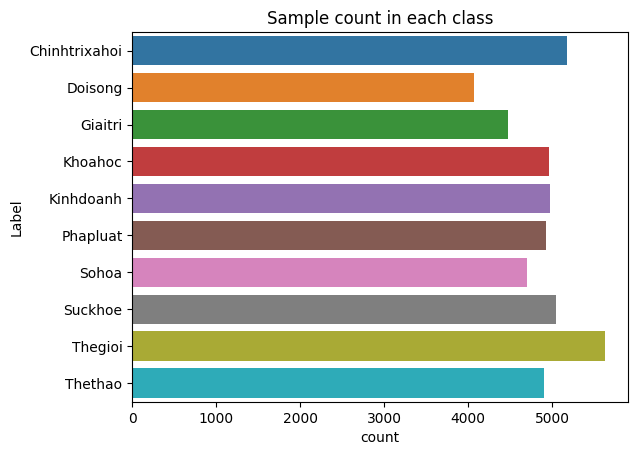

In [7]:
sns.countplot(y=y_data)
plt.ylabel("Label")
plt.title("Sample count in each class")

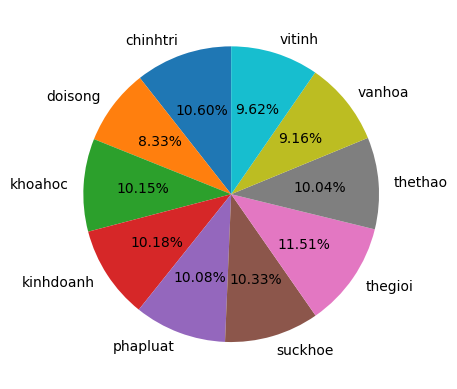

In [11]:
a= np.array([len(chinhtri), len(doisong), len(khoahoc), len(kinhdoanh),len(phapluat),len(suckhoe),len(thegioi),len(thethao),len(giaitri),len(sohoa)])
mylabels = ["chinhtri", "doisong", "khoahoc", "kinhdoanh","phapluat","suckhoe","thegioi","thethao","vanhoa","vitinh"]
plt.pie(a, labels = mylabels, startangle = 90,autopct='%1.2f%%')
plt.show()

In [13]:
import pandas as pd  
df = pd.DataFrame(list(zip(X_data, y_data)), columns = ['text', 'lable'])  
print(df)  

                                                    text          lable
0      cháy căn hộ toà nhà tầng sài gòn lửa cháy dữ d...  Chinhtrixahoi
1      chủ xe cá nhân có thể được xác nhận điện tử gi...  Chinhtrixahoi
2      không xây bãi xe ngầm tầng sân golf trung tâm ...  Chinhtrixahoi
3      bộ đội việt nam phát hiện vị trí có dấu hiệu s...  Chinhtrixahoi
4      vì sao đường võ chí công chưa hoàn thành xe kh...  Chinhtrixahoi
...                                                  ...            ...
48893  hlv srimaka thái lan không có đối thủ sea game...        Thethao
48894  cụ ông tuổi nước rút ngoạn mục để vô địch thế ...        Thethao
48895  cầu thủ indonesia khóc vì mất quyền dự world c...        Thethao
48896  alcaraz đấu sinner bán kết miami open mỹcarlos...        Thethao
48897  rooney dự đoán man city vô địch ngoại hạng anh...        Thethao

[48898 rows x 2 columns]


<AxesSubplot: xlabel='word_length', ylabel='Count'>

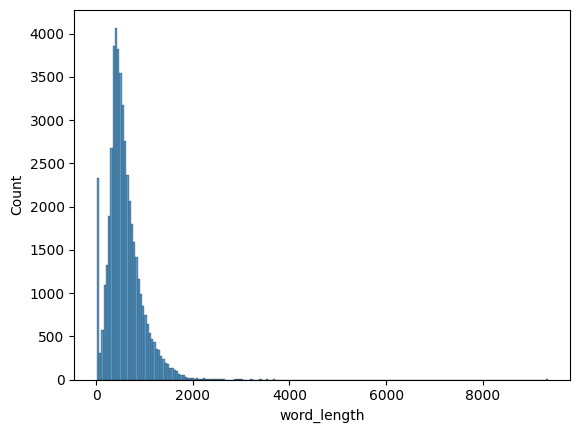

In [14]:
def wl(text):
  return len(text.split(" "))
df['word_length'] = df['text'].apply(wl)
sns.histplot(data=df, x="word_length", bins=200)

In [15]:
df_chinhtri = df[df['lable']=='Chinhtrixahoi']
df_doisong = df[df['lable']=='Doisong']
df_khoahoc = df[df['lable']=='Khoahoc']
df_kinhdoanh = df[df['lable']=='Kinhdoanh']
df_phapluat = df[df['lable']=='Phapluat']
df_suckhoe = df[df['lable']=='Suckhoe']
df_thegioi = df[df['lable']=='Thegioi']
df_thethao = df[df['lable']=='Thethao']
df_giaitri = df[df['lable']=='Giaitri']
df_sohoa = df[df['lable']=='Sohoa']

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14664\1863438815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chinhtri['word_length'] = df_chinhtri['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

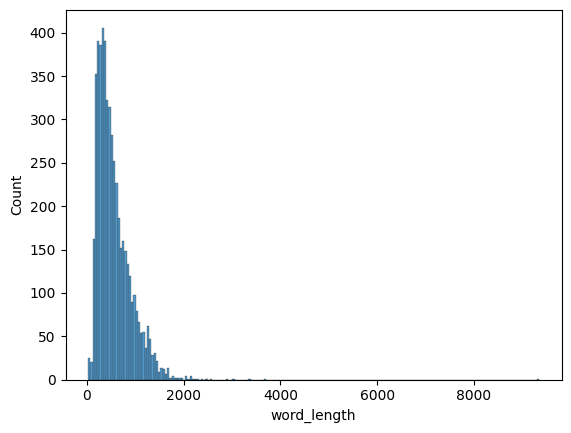

In [16]:
df_chinhtri['word_length'] = df_chinhtri['text'].apply(wl)
sns.histplot(data=df_chinhtri, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14664\2340140034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doisong['word_length'] = df_doisong['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

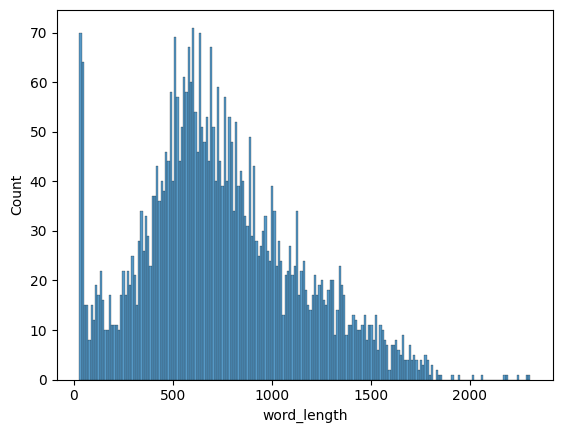

In [17]:
df_doisong['word_length'] = df_doisong['text'].apply(wl)
sns.histplot(data=df_doisong, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14664\271788771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_khoahoc['word_length'] = df_khoahoc['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

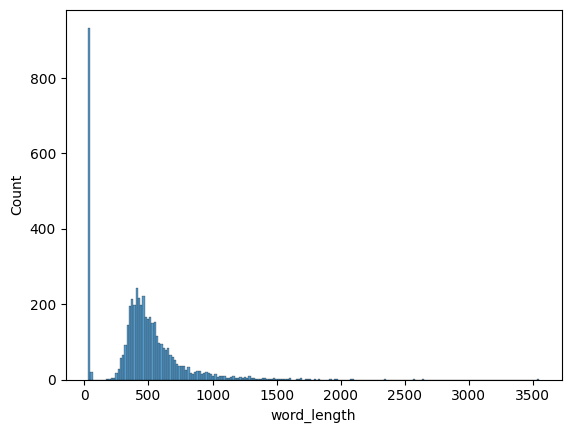

In [19]:
df_khoahoc['word_length'] = df_khoahoc['text'].apply(wl)
sns.histplot(data=df_khoahoc, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14664\1868496178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kinhdoanh['word_length'] = df_kinhdoanh['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

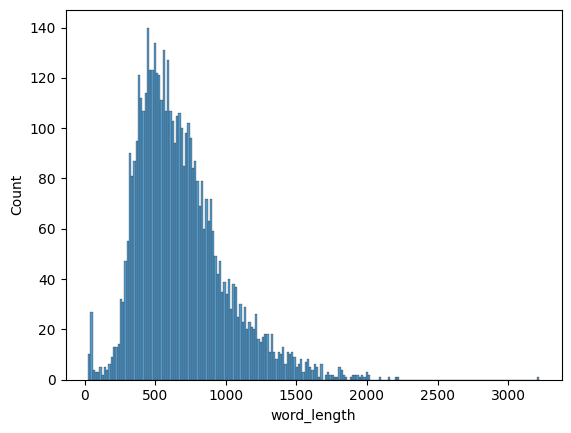

In [20]:
df_kinhdoanh['word_length'] = df_kinhdoanh['text'].apply(wl)
sns.histplot(data=df_kinhdoanh, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14664\3888704215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phapluat['word_length'] = df_phapluat['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

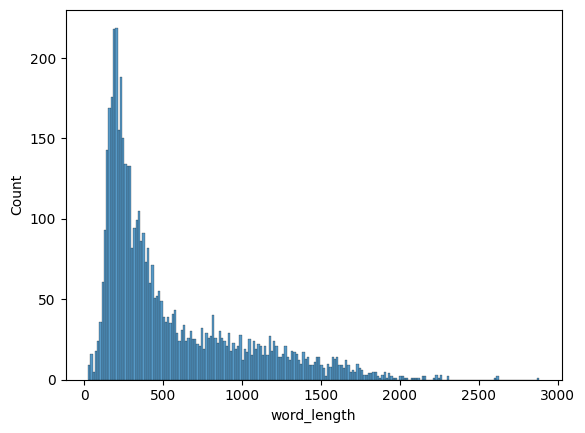

In [21]:
df_phapluat['word_length'] = df_phapluat['text'].apply(wl)
sns.histplot(data=df_phapluat, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14664\2687371686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_suckhoe['word_length'] = df_suckhoe['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

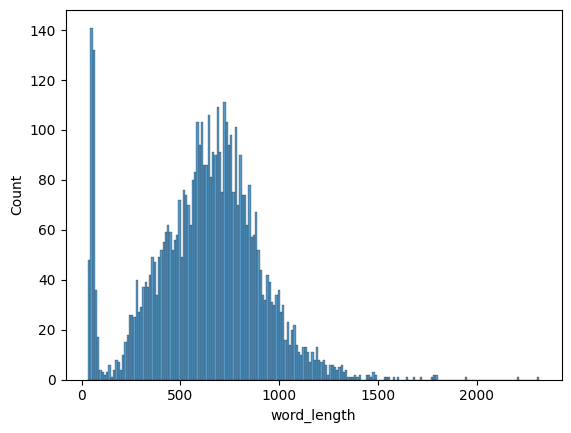

In [22]:
df_suckhoe['word_length'] = df_suckhoe['text'].apply(wl)
sns.histplot(data=df_suckhoe, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14664\3773760432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thegioi['word_length'] = df_thegioi['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

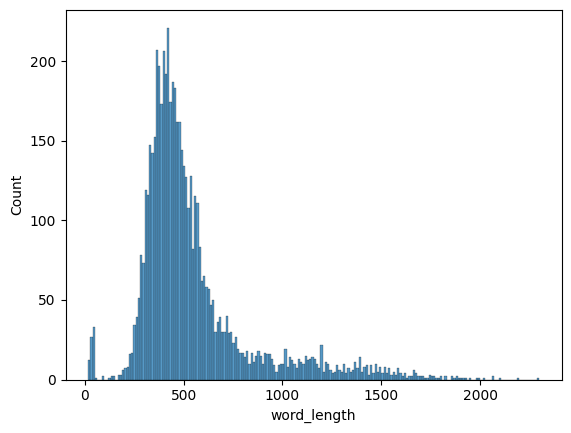

In [23]:
df_thegioi['word_length'] = df_thegioi['text'].apply(wl)
sns.histplot(data=df_thegioi, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14664\1918746575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thethao['word_length'] = df_thethao['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

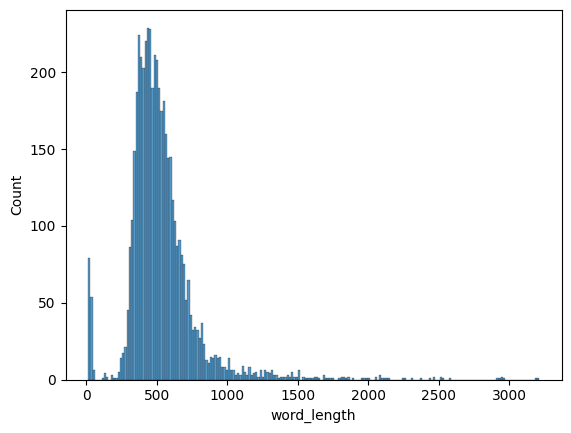

In [24]:
df_thethao['word_length'] = df_thethao['text'].apply(wl)
sns.histplot(data=df_thethao, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14664\1918746575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thethao['word_length'] = df_thethao['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

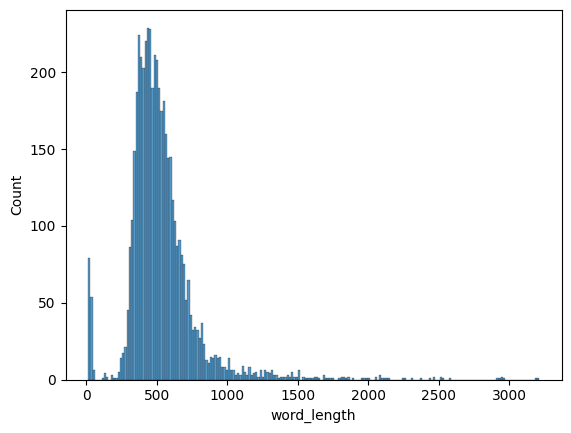

In [25]:
df_thethao['word_length'] = df_thethao['text'].apply(wl)
sns.histplot(data=df_thethao, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14664\2196652801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_giaitri['word_length'] = df_giaitri['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

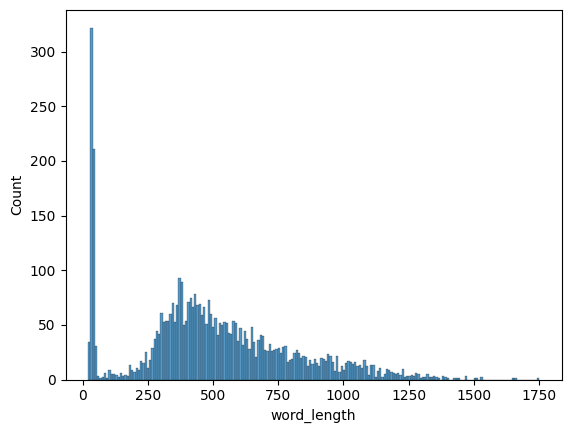

In [26]:
df_giaitri['word_length'] = df_giaitri['text'].apply(wl)
sns.histplot(data=df_giaitri, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14664\997336162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sohoa['word_length'] = df_sohoa['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

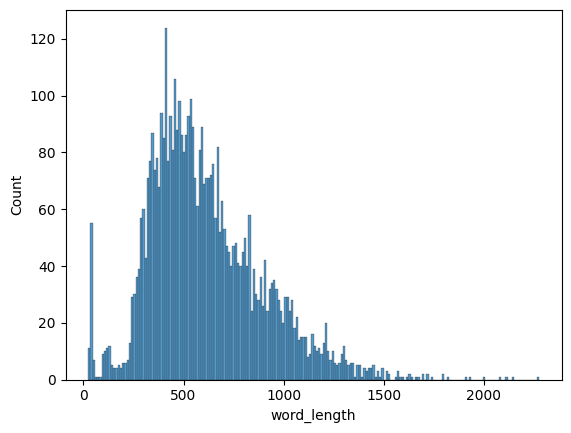

In [27]:
df_sohoa['word_length'] = df_sohoa['text'].apply(wl)
sns.histplot(data=df_sohoa, x="word_length", bins=200)

In [11]:
def wl(text):
  return len(text.split(" "))

#sns.histplot(data=chintri_split, x="word_length", bins=20)

In [10]:
#sns.histplot(data=chintri_split, x="word_length", bins=20)

In [13]:
len_chinhtri = []
for i in chinhtri:
    len_chinhtri.append(wl(i))

In [19]:
len_chinhtri

[292,
 537,
 287,
 396,
 768,
 196,
 511,
 229,
 243,
 468,
 188,
 213,
 162,
 848,
 263,
 307,
 514,
 388,
 626,
 144,
 854,
 318,
 281,
 161,
 564,
 228,
 116,
 233,
 280,
 218,
 160,
 1008,
 651,
 503,
 219,
 378,
 616,
 801,
 199,
 217,
 335,
 276,
 470,
 319,
 471,
 719,
 641,
 162,
 456,
 264,
 401,
 215,
 194,
 205,
 272,
 503,
 333,
 183,
 633,
 475,
 450,
 273,
 561,
 142,
 948,
 221,
 227,
 276,
 227,
 415,
 881,
 514,
 775,
 266,
 320,
 161,
 261,
 401,
 749,
 172,
 106,
 227,
 315,
 203,
 425,
 168,
 290,
 136,
 784,
 569,
 547,
 199,
 248,
 420,
 274,
 1047,
 183,
 244,
 466,
 593,
 476,
 281,
 310,
 186,
 451,
 339,
 155,
 211,
 759,
 256,
 653,
 858,
 580,
 300,
 205,
 398,
 138,
 205,
 447,
 249,
 436,
 535,
 144,
 212,
 258,
 318,
 864,
 1108,
 287,
 131,
 596,
 696,
 204,
 538,
 302,
 218,
 415,
 214,
 270,
 719,
 353,
 307,
 980,
 271,
 895,
 510,
 126,
 158,
 337,
 421,
 251,
 564,
 398,
 241,
 131,
 234,
 349,
 231,
 131,
 201,
 671,
 279,
 929,
 467,
 204,
 276,
 

In [21]:
import seaborn as sns
sns.histplot(data=len_chinhtri, x="word_length")

ValueError: Could not interpret value `word_length` for parameter `x`